# Read DF

In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
import pickle
import warnings
from sklearn import metrics
from sklearn.metrics import f1_score
warnings.filterwarnings("ignore")

In [2]:
labelled_df = pd.read_csv("training_data_india.csv")
labelled_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
labelled_df

,Text,new_text,languages,translated,new_languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,subjectivity,text_type
0,"#pickids : about 20,000 children perlis eligib...","#pickids : about 20,000 children perlis eligib...",ENGLISH,"#pickids : about 20,000 children perlis eligib...",ENGLISH,"[('pickins', 'NNS'), ('about', 'IN'), ('twenty...","['pickins', 'twenty', 'zero', 'child', 'peril'...","['child', 'peril', 'eligible', 'couid', 'vacci...","['child', 'peril', 'couid', 'vaccination']",0.000000,objective
1,previous covid-19 infection – but not vaccinat...,previous covid-19 infection – but not vaccinat...,ENGLISH,previous covid-19 infection – but not vaccinat...,ENGLISH,"[('previous', 'JJ'), ('couid', 'NN'), ('ninete...","['previous', 'couid', 'nineteen', 'infection',...","['previous', 'couid', 'infection', 'vaccinatio...","['couid', 'infection', 'vaccination', 'perform...",0.166667,objective
2,india’s covid-19 vaccination coverage crosses ...,india’s covid-19 vaccination coverage crosses ...,ENGLISH,india’s covid-19 vaccination coverage crosses ...,ENGLISH,"[('india', 'NN'), ('i', 'NN'), ('i', 'VBP'), (...","['india', 'couid', 'nineteen', 'vaccination', ...","['vaccination', 'mark']",['vaccination'],0.000000,objective
3,i got call office principal commissioner cgst ...,i got call office principal commissioner cgst ...,ENGLISH,i got call office principal commissioner cgst ...,ENGLISH,"[('i', 'NN'), ('got', 'VBD'), ('call', 'JJ'), ...","['got', 'call', 'office', 'principal', 'commis...","['get', 'call', 'office', 'ascertain', 'status...","['office', 'status', 'couid', 'vaccination', '...",0.000000,objective
4,"i have booked flight 13 feb, 2022 toronto new ...","i have booked flight 13 feb, 2022 toronto new ...",ENGLISH,"i have booked flight 13 feb, 2022 toronto new ...",ENGLISH,"[('i', 'NNS'), ('have', 'VBP'), ('booked', 'VB...","['booked', 'flight', 'thirteen', 'feb', 'toron...","['book', 'departure', 'time', 'let', 'know', '...","['departure', 'time', 'guideline', 'today', 'c...",0.727273,objective
...,...,...,...,...,...,...,...,...,...,...,...
995,they should allow businesses with reduced capa...,they should allow businesses with reduced capa...,ENGLISH,they should allow businesses with reduced capa...,ENGLISH,"[('they', 'PRP'), ('should', 'MD'), ('allow', ...","['allow', 'business', 'reduced', 'capacity', '...","['allow', 'business', 'reduce', 'capacity', 'a...","['business', 'capacity', 'couid', 'guideline',...",0.000000,subjective
996,patiala covid vaccination schedule 12 january🔴...,patiala covid vaccination schedule 12 januaryr...,ENGLISH,patiala covid vaccination schedule 12 januaryr...,ENGLISH,"[('patiala', 'NN'), ('couid', 'NN'), ('vaccina...","['patiala', 'couid', 'vaccination', 'schedule'...","['schedule', 'patiala_politic']","['schedule', 'patiala_politic']",0.000000,objective
997,"hi team, i am trying get covid vaccination cer...","hi team, i am trying get covid vaccination cer...",ENGLISH,"hi team, i am trying get covid vaccination cer...",ENGLISH,"[('hi', 'NN'), ('team', 'NN'), ('i', 'NN'), ('...","['hi', 'team', 'trying', 'get', 'couid', 'vacc...","['team', 'try', 'couid', 'vaccination', 'certi...","['team', 'couid', 'vaccination', 'certificate'...",0.000000,objective
998,#dimapur | 11jan 2022: covid-19 vaccination at...,#dimapur | 11jan 2022: covid-19 vaccination at...,ENGLISH,#dimapur | 11jan 2022: covid-19 vaccination at...,ENGLISH,"[('diaper', 'NN'), ('jan', 'NN'), ('couid', 'N...","['diaper', 'jan', 'couid', 'nineteen', 'vaccin...","['vaccination', 'join', 'charitable', 'clinic'...","['vaccination', 'clinic', 'number', 'school', ...",0.525000,objective


In [3]:
whole_df = pd.read_csv("../india-v1-preprocessed-overall.csv")
whole_df.drop(['Unnamed: 0'], axis=1, inplace=True)
whole_df

,Text,new_text,languages,translated,new_languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,soniya mummy hoti toh covid me magic stick ghu...,soniya mummy hoti toh covid me magic stick ghu...,Unknown,soniya mummy hoti toh covid me magic stick ghu...,Unknown,"[('soniya', 'JJ'), ('mummy', 'NN'), ('hot', 'J...","['soniya', 'mummy', 'hot', 'toh', 'couid', 'ma...",['death'],['death']
1,"#pickids : about 20,000 children perlis eligib...","#pickids : about 20,000 children perlis eligib...",ENGLISH,"#pickids : about 20,000 children perlis eligib...",ENGLISH,"[('pickins', 'NNS'), ('about', 'IN'), ('twenty...","['pickins', 'twenty', 'zero', 'child', 'peril'...","['child', 'peril', 'eligible', 'couid', 'vacci...","['child', 'peril', 'couid', 'vaccination']"
2,previous covid-19 infection – but not vaccinat...,previous covid-19 infection – but not vaccinat...,ENGLISH,previous covid-19 infection – but not vaccinat...,ENGLISH,"[('previous', 'JJ'), ('couid', 'NN'), ('ninete...","['previous', 'couid', 'nineteen', 'infection',...","['previous', 'couid', 'infection', 'vaccinatio...","['couid', 'infection', 'vaccination', 'perform..."
3,india’s covid-19 vaccination coverage crosses ...,india’s covid-19 vaccination coverage crosses ...,ENGLISH,india’s covid-19 vaccination coverage crosses ...,ENGLISH,"[('india', 'NN'), ('i', 'NN'), ('i', 'VBP'), (...","['india', 'couid', 'nineteen', 'vaccination', ...","['vaccination', 'mark']",['vaccination']
4,i got call office principal commissioner cgst ...,i got call office principal commissioner cgst ...,ENGLISH,i got call office principal commissioner cgst ...,ENGLISH,"[('i', 'NN'), ('got', 'VBD'), ('call', 'JJ'), ...","['got', 'call', 'office', 'principal', 'commis...","['get', 'call', 'office', 'ascertain', 'status...","['office', 'status', 'couid', 'vaccination', '..."
...,...,...,...,...,...,...,...,...,...
95183,mask up 😷 india 🇮🇳 come forward vaccination ti...,mask up face_with_medical_mask india India com...,"ENGLISH, Unknown",mask up face_with_medical_mask india India com...,ENGLISH,"[('mask', 'VB'), ('up', 'RP'), ('india', 'JJ')...","['mask', 'india', 'india', 'come_forward', 'va...","['come_forward', 'vaccination', 'tika_tsar', '...","['vaccination', 'syringemicrobe', 'television'..."
95184,our sincere request state central govt 🙏🙏. ple...,our sincere request state central govt folded_...,ENGLISH,our sincere request state central govt folded_...,ENGLISH,"[('our', 'PRP$'), ('sincere', 'JJ'), ('request...","['sincere', 'request', 'state', 'central', 'go...","['sincere', 'request', 'state', 'central', 'go...","['request', 'state', 'govt', 'share', 'vaccine..."
95185,thanks your appreciation valuable feedback abo...,thanks your appreciation valuable feedback abo...,ENGLISH,thanks your appreciation valuable feedback abo...,ENGLISH,"[('thanks', 'NNS'), ('your', 'PRP$'), ('apprec...","['thank', 'appreciation', 'valuable', 'feedbac...","['thank', 'appreciation', 'valuable', 'feedbac...","['thank', 'appreciation', 'feedback', 'vaccine..."
95186,i can’t wait get my 2nd dose #covidvaccine ove...,i can’t wait get my 2nd dose #covidvaccine ove...,"Unknown, ENGLISH",i can’t wait get my 2nd dose #covidvaccine ove...,ENGLISH,"[('i', 'NN'), ('can', 'MD'), ('i', 'VB'), ('i'...","['wait', 'get', 'dose', 'covidvaccine', 'amp',...","['wait', 'get', 'dose', 'covidvaccine', 'amp',...","['dose', 'covidvaccine', 'amp', 'amp', 'follow..."


# Logistic Regression

In [4]:
training_data, test_data = sklearn.model_selection.train_test_split(labelled_df, train_size = 0.8, random_state=1)

In [5]:
print(training_data.shape)
print(test_data.shape)

(800, 11)
(200, 11)


In [6]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    model = LogisticRegression(C=_C).fit(X_tr, y_tr)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred, average='weighted')
    print('Accuracy', description, 'features', accuracy)
    print('F1 Score', description, 'features', f1score)
    return model

In [7]:
y_tr = training_data['text_type']
y_te = test_data['text_type']

In [8]:
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}

## Train Model

### BoW

In [9]:
bow_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
x = bow_converter.fit_transform(whole_df['translated'])

words = bow_converter.get_feature_names()
len(words)

1385

In [10]:
bow_transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False) 

In [11]:
whole_data_bow = bow_transform.fit_transform(whole_df["translated"])

In [12]:
whole_data_bow

<95188x57142 sparse matrix of type '<class 'numpy.int64'>'
	with 12118915 stored elements in Compressed Sparse Row format>

In [13]:
X_tr_bow = bow_transform.transform(training_data['translated'])

In [14]:
X_tr_bow

<800x57142 sparse matrix of type '<class 'numpy.int64'>'
	with 113487 stored elements in Compressed Sparse Row format>

In [15]:
len(bow_transform.vocabulary_)

57142

In [16]:
X_tr_bow.shape

(800, 57142)

In [17]:
X_te_bow = bow_transform.transform(test_data['translated'])

In [18]:
X_te_bow

<200x57142 sparse matrix of type '<class 'numpy.int64'>'
	with 27756 stored elements in Compressed Sparse Row format>

In [19]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

Accuracy bow features 0.825
F1 Score bow features 0.8179581264839197


In [20]:
bow_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)

In [21]:
bow_search.fit(X_tr_bow, y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [22]:
bow_search.best_score_

0.83375

In [23]:
bow_search.best_params_

{'C': 0.1}

In [24]:
bow_search.cv_results_

{'mean_fit_time': array([0.22053623, 0.25046992, 0.49780788, 0.83671269, 0.90165167,
        0.86829038]),
 'std_fit_time': array([0.00489112, 0.02380017, 0.03221123, 0.04329328, 0.01809082,
        0.01743323]),
 'mean_score_time': array([0.00090485, 0.00091586, 0.00085945, 0.00107241, 0.00102148,
        0.00102515]),
 'std_score_time': array([5.85565738e-05, 4.23971253e-05, 1.01589975e-04, 2.04642765e-04,
        5.70887002e-05, 9.25043686e-05]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.66875, 0.7875 , 0.85625, 0.84375, 0.8375 , 0.83125]),
 'split1_test_score': array([0.66875, 0.76875, 0.84375, 0.8375 , 0.84375, 0.84375]),
 'split2_test_score': array([0.66875, 0.74375, 0.7875 , 0.775  , 0.775  , 0.76875]),
 'spl

In [25]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow', 
                              _C=bow_search.best_params_['C'])

Accuracy bow features 0.83
F1 Score bow features 0.822579365079365


### TF-IDF

In [26]:
tfidf_transform = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_transform.fit_transform(X_tr_bow)

In [27]:
X_tr_tfidf

<800x57142 sparse matrix of type '<class 'numpy.float64'>'
	with 113487 stored elements in Compressed Sparse Row format>

In [28]:
X_te_tfidf = tfidf_transform.transform(X_te_bow)

In [29]:
X_te_tfidf

<200x57142 sparse matrix of type '<class 'numpy.float64'>'
	with 27756 stored elements in Compressed Sparse Row format>

In [30]:
model_tfidf = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Accuracy tf-idf features 0.84
F1 Score tf-idf features 0.8340915225125752


In [31]:
tfidf_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5,
                                   param_grid=param_grid_)

In [32]:
tfidf_search.fit(X_tr_tfidf, y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [33]:
tfidf_search.best_score_

0.83625

In [34]:
tfidf_search.best_params_

{'C': 0.1}

In [35]:
model_tfidf = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf', 
                              _C=tfidf_search.best_params_['C'])

Accuracy tf-idf features 0.84
F1 Score tf-idf features 0.8340915225125752


### Overall Comparison - BoW vs TF-IDF

In [36]:
results_file = open('tfidf_gridcv_results.pkl', 'wb')
pickle.dump(bow_search, results_file, -1)
pickle.dump(tfidf_search, results_file, -1)
results_file.close()

In [37]:
pkl_file = open('tfidf_gridcv_results.pkl', 'rb')
bow_search = pickle.load(pkl_file)
tfidf_search = pickle.load(pkl_file)
pkl_file.close()

In [38]:
search_results = pd.DataFrame.from_dict({'bow': bow_search.cv_results_['mean_test_score'],
                               'tfidf': tfidf_search.cv_results_['mean_test_score']})
search_results

,bow,tfidf
0,0.66625,0.66625
1,0.76000,0.82875
2,0.83375,0.83625
3,0.82375,0.83125
4,0.81750,0.82750
5,0.81625,0.82375


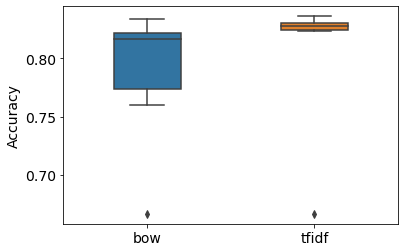

In [39]:
%matplotlib inline
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)
plt.savefig('tfidf_gridcv_results.png')

## Implement on whole df

In [51]:
whole_data_bow

<95188x57142 sparse matrix of type '<class 'numpy.int64'>'
	with 12118915 stored elements in Compressed Sparse Row format>

In [52]:
whole_tfidf = tfidf_transform.fit_transform(whole_data_bow)

In [54]:
whole_tfidf

<95188x57142 sparse matrix of type '<class 'numpy.float64'>'
	with 12118915 stored elements in Compressed Sparse Row format>

In [55]:
predictions = model_tfidf.predict(whole_tfidf)

In [56]:
predictions

array(['objective', 'objective', 'objective', ..., 'objective',
       'subjective', 'objective'], dtype=object)

In [57]:
whole_df["text_type"] = predictions

In [58]:
whole_df

,Text,new_text,languages,translated,new_languages,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,text_type
0,soniya mummy hoti toh covid me magic stick ghu...,soniya mummy hoti toh covid me magic stick ghu...,Unknown,soniya mummy hoti toh covid me magic stick ghu...,Unknown,"[('soniya', 'JJ'), ('mummy', 'NN'), ('hot', 'J...","['soniya', 'mummy', 'hot', 'toh', 'couid', 'ma...",['death'],['death'],objective
1,"#pickids : about 20,000 children perlis eligib...","#pickids : about 20,000 children perlis eligib...",ENGLISH,"#pickids : about 20,000 children perlis eligib...",ENGLISH,"[('pickins', 'NNS'), ('about', 'IN'), ('twenty...","['pickins', 'twenty', 'zero', 'child', 'peril'...","['child', 'peril', 'eligible', 'couid', 'vacci...","['child', 'peril', 'couid', 'vaccination']",objective
2,previous covid-19 infection – but not vaccinat...,previous covid-19 infection – but not vaccinat...,ENGLISH,previous covid-19 infection – but not vaccinat...,ENGLISH,"[('previous', 'JJ'), ('couid', 'NN'), ('ninete...","['previous', 'couid', 'nineteen', 'infection',...","['previous', 'couid', 'infection', 'vaccinatio...","['couid', 'infection', 'vaccination', 'perform...",objective
3,india’s covid-19 vaccination coverage crosses ...,india’s covid-19 vaccination coverage crosses ...,ENGLISH,india’s covid-19 vaccination coverage crosses ...,ENGLISH,"[('india', 'NN'), ('i', 'NN'), ('i', 'VBP'), (...","['india', 'couid', 'nineteen', 'vaccination', ...","['vaccination', 'mark']",['vaccination'],objective
4,i got call office principal commissioner cgst ...,i got call office principal commissioner cgst ...,ENGLISH,i got call office principal commissioner cgst ...,ENGLISH,"[('i', 'NN'), ('got', 'VBD'), ('call', 'JJ'), ...","['got', 'call', 'office', 'principal', 'commis...","['get', 'call', 'office', 'ascertain', 'status...","['office', 'status', 'couid', 'vaccination', '...",objective
...,...,...,...,...,...,...,...,...,...,...
95183,mask up 😷 india 🇮🇳 come forward vaccination ti...,mask up face_with_medical_mask india India com...,"ENGLISH, Unknown",mask up face_with_medical_mask india India com...,ENGLISH,"[('mask', 'VB'), ('up', 'RP'), ('india', 'JJ')...","['mask', 'india', 'india', 'come_forward', 'va...","['come_forward', 'vaccination', 'tika_tsar', '...","['vaccination', 'syringemicrobe', 'television'...",subjective
95184,our sincere request state central govt 🙏🙏. ple...,our sincere request state central govt folded_...,ENGLISH,our sincere request state central govt folded_...,ENGLISH,"[('our', 'PRP$'), ('sincere', 'JJ'), ('request...","['sincere', 'request', 'state', 'central', 'go...","['sincere', 'request', 'state', 'central', 'go...","['request', 'state', 'govt', 'share', 'vaccine...",objective
95185,thanks your appreciation valuable feedback abo...,thanks your appreciation valuable feedback abo...,ENGLISH,thanks your appreciation valuable feedback abo...,ENGLISH,"[('thanks', 'NNS'), ('your', 'PRP$'), ('apprec...","['thank', 'appreciation', 'valuable', 'feedbac...","['thank', 'appreciation', 'valuable', 'feedbac...","['thank', 'appreciation', 'feedback', 'vaccine...",objective
95186,i can’t wait get my 2nd dose #covidvaccine ove...,i can’t wait get my 2nd dose #covidvaccine ove...,"Unknown, ENGLISH",i can’t wait get my 2nd dose #covidvaccine ove...,ENGLISH,"[('i', 'NN'), ('can', 'MD'), ('i', 'VB'), ('i'...","['wait', 'get', 'dose', 'covidvaccine', 'amp',...","['wait', 'get', 'dose', 'covidvaccine', 'amp',...","['dose', 'covidvaccine', 'amp', 'amp', 'follow...",subjective


In [59]:
whole_df["text_type"].value_counts()

objective     58388
subjective    36800
Name: text_type, dtype: int64

In [60]:
whole_df.to_csv("labelled_data_india_LR.csv")